## Business Problem
Company X has recently introduced a new type of bidding, average bidding, as an alternative to the current type of bidding called maximum bidding. One of our clients, bombabomba.com, decided to test this new feature and wants to do an A/B test to see if average bidding converts more than maximum bidding.

## Dataset Story
In this dataset, which includes the website information of bombabomba.com, there is information such as the number of advertisements that users see and click, as well as earnings information from here. There are two separate data sets, the control and test groups. The max binding strategy was presented to the control group, and the average binding strategy was presented to the test group.

## Features

**Impression**	Ad views count
**Click**	The number of clicks on the displayed ad
**Purchase**	The number of products purchased after the ads clicked
**Earning**	Earnings after purchased products

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [17]:
A = pd.read_excel("ab_testing.xlsx", sheet_name="Control Group")
B = pd.read_excel("ab_testing.xlsx", sheet_name="Test Group")

In [32]:
def check_df(dataframe, head=5):
    print('\033[1m' + '------------------ Shape ------------------' + '\033[0m')
    print(dataframe.shape)

    print('\033[1m' + '------------------ Types ------------------' + '\033[0m')
    print(dataframe.dtypes)

    print('\033[1m' + '------------------ Head ------------------' + '\033[0m')
    print(dataframe.head(head))

    print('\033[1m' + '------------------ Columns ------------------' + '\033[0m')
    print(dataframe.columns)

    print('\033[1m' + '--------------- Unique Elements ---------------' + '\033[0m')
    print(dataframe.nunique())

    print('\033[1m' + '------------------ NA ------------------' + '\033[0m')
    print(dataframe.isnull().sum())

    print('\033[1m' + '------------------ Quantiles ------------------' + '\033[0m')
    print(dataframe.describe([0.05, 0.50, 0.95, 0.99]).T)

In [33]:
def create_box_plot(dataframe, column=None):
    print('\033[1m' + '------------------ BOX PLOT ------------------' + '\033[0m')
    sns.boxplot(x=dataframe[column])
    print(plt.show())

In [94]:
check_df(A)

------------------ Shape ------------------
(40, 4)
------------------ Types ------------------
Impression_A    float64
Click_A         float64
Purchase_A      float64
Earning_A       float64
dtype: object
------------------ Head ------------------
   Impression_A   Click_A  Purchase_A  Earning_A
0    82529.4593 6090.0773    665.2113  2311.2771
1    98050.4519 3382.8618    315.0849  1742.8069
2    82696.0235 4167.9657    458.0837  1797.8274
3   109914.4004 4910.8822    487.0908  1696.2292
4   108457.7626 5987.6558    441.0340  1543.7202
------------------ Columns ------------------
Index(['Impression_A', 'Click_A', 'Purchase_A', 'Earning_A'], dtype='object')
--------------- Unique Elements ---------------
Impression_A    40
Click_A         40
Purchase_A      40
Earning_A       40
dtype: int64
------------------ NA ------------------
Impression_A    0
Click_A         0
Purchase_A      0
Earning_A       0
dtype: int64
------------------ Quantiles ------------------
               count  

------------------ BOX PLOT ------------------


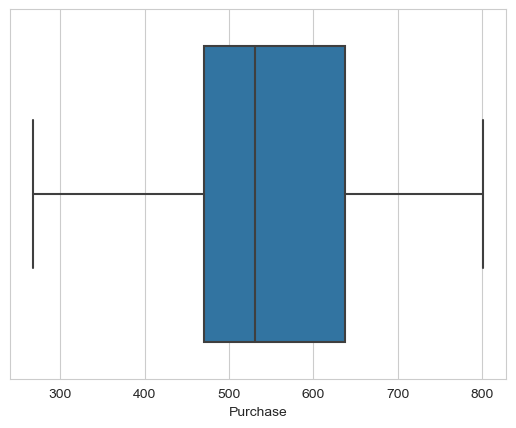

None


In [31]:
create_box_plot(A, column="Purchase")

In [36]:
check_df(B)

------------------ Shape ------------------
(40, 4)
------------------ Types ------------------
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
------------------ Head ------------------
   Impression     Click  Purchase   Earning
0 120103.5038 3216.5480  702.1603 1939.6112
1 134775.9434 3635.0824  834.0543 2929.4058
2 107806.6208 3057.1436  422.9343 2526.2449
3 116445.2755 4650.4739  429.0335 2281.4286
4 145082.5168 5201.3877  749.8604 2781.6975
------------------ Columns ------------------
Index(['Impression', 'Click', 'Purchase', 'Earning'], dtype='object')
--------------- Unique Elements ---------------
Impression    40
Click         40
Purchase      40
Earning       40
dtype: int64
------------------ NA ------------------
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64
------------------ Quantiles ------------------
             count        mean        std        min         5%         50%  \
Impre

------------------ BOX PLOT ------------------


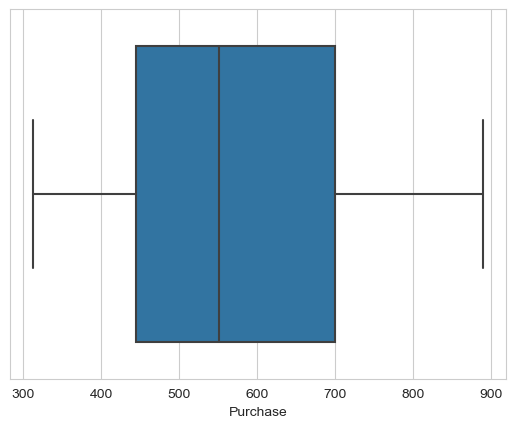

None


In [37]:
create_box_plot(B, column="Purchase")

In [47]:
A.columns = [i+"_A" for i in A.columns]
B.columns = [i+"_B" for i in B.columns]

In [48]:
A.head().style.background_gradient(cmap="Blues")

,Impression_A,Click_A,Purchase_A,Earning_A
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [58]:
B.head().style.background_gradient(cmap="PuRd")

,Impression_B,Click_B,Purchase_B,Earning_B
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [78]:
df = pd.concat([A, B], axis=1)
df.head().style.background_gradient(cmap="Purples")

,Impression_A,Click_A,Purchase_A,Earning_A,Impression_B,Click_B,Purchase_B,Earning_B
0,82529.459271,6090.077317,665.211255,2311.277143,120103.503796,3216.547958,702.160346,1939.611243
1,98050.451926,3382.861786,315.084895,1742.806855,134775.943363,3635.082422,834.054286,2929.405820
2,82696.023549,4167.965750,458.083738,1797.827447,107806.620788,3057.143560,422.934258,2526.244877
3,109914.400398,4910.882240,487.090773,1696.229178,116445.275526,4650.473911,429.033535,2281.428574
4,108457.762630,5987.655811,441.034050,1543.720179,145082.516838,5201.387724,749.860442,2781.697521


**1. Set up the Hypothesis**

**H0: M1 = M2**

--> There is no statistical difference between the average purchase earned by the maximum binding strategy and the average purchase achieved by the average binding strategy.

**H1: M1 != M2**

--> There is a statistical difference between the average purchase earned by the maximum binding strategy and the average purchases earned by the average binding strategy.

In [65]:
print('\033[1m' + 'Mean of purchase of control group' + '\033[0m')
print(A.Purchase_A.mean())
print('\033[1m' + 'Mean of purchase of test group' + '\033[0m')
print(B.Purchase_B.mean())

Mean of purchase of control group
550.8940587702316
Mean of purchase of test group
582.1060966484675


**Looking at the purchase rates for the two groups, there is a difference and Group B seems to be more successful.
However, we do not know whether this difference is statistically significant. To understand this, we need to perform hypothesis testing.**

**2. Assumption Check**

**2.1. Normality Assumption**

* H0: There is no statistically significant difference between sample distribution and theoretical normal distribution.
* H1: There is statistically significant difference between sample distribution and theoretical normal distribution.

The test rejects the normality hypothesis when the p value is less than or equal to 0.05.
It is undesirable to reject the null hypothesis in tests that can be considered for assumptions.

p-value < 0.05 (H0 rejected)
p-value > 0.05 (H0 not rejected)

In [70]:
# Shapiro-Wilks Tests

print('\033[1m' + '----- Control group -----' + '\033[0m')
test_stat, p_value = shapiro(A['Purchase_A'])
print('Test statistic = %.4f, P-value = %.4f' % (test_stat, p_value))

print('\033[1m' + '----- Test group -----' + '\033[0m')
test_st , p_value = shapiro(B["Purchase_B"])
print('Test statistic = %.4f, P-Value = %.4f' % (test_st, p_value))

----- Control group -----
Test statistic = 0.9773, P-value = 0.5891
----- Test group -----
Test statistic = 0.9589, P-Value = 0.1541


**Since the p value is not less than 0.05, the H0 hypothesis cannot be rejected. The assumption of normality is provided for the control group.**

**2.2. Variance Assumption**

* H0: the compared groups have equal variance.
* H1: the compared groups do not have equal variance.

It is undesirable to reject the null hypothesis in tests that can be considered for assumptions.

p-value < 0.05 (H0 rejected)
p-value > 0.05 (H0 not rejected)

In [79]:
# Levene Test

test_st, p_value = levene(df["Purchase_A"],df["Purchase_B"])
print('Test statistic = %.4f, p-Value = %.4f' %(test_st, p_value))

Test statistic = 2.6393, p-Value = 0.1083


**Since the p value is not less than 0.05 the H0 hypothesis cannot be rejected. That is, the assumption of variance is provided.**

**Assumptions provided. Thus, we can apply the independent two-sample t-test (parametric test).**

In [75]:
test_st, p_value = ttest_ind(df["Purchase_A"], df["Purchase_B"], equal_var=True)
print('Test statistic = %.4f, p_value = %.4f' %(test_st, p_value))

Test statistic = -0.9416, p_value = 0.3493


**P-value = 0.3493.**

**Since the p value is not less than 0.05, the H0 hypothesis cannot be rejected.**

**There is no statistically significant difference between the "Maximum Bidding" campaign control group and the "Test group" with the "Average Bidding" campaign. Therefore, we recommend that you continue with the campaign that gives the "Maximum Bidding" currently used.**

**I used parametric hypothesis testing since variance homogeneity and normality assumption were provided.**